In [5]:
import pandas as pd
import numpy as np
import os

# Increase RAM size in Google Colab by creating an infinite loop

In [6]:
# a = []
# while(1):
#     a.append('1')

# Read Past Safety incidents dataset

In [7]:
os.chdir(r'C:\\Users\\govindsg\\Google Drive\\Spring 2020 OGE\\OGE\\QoM2 Predict next safety incident')
pastInc = pd.read_excel('IncidentManagementData_OGESafetyDataIncidentsCreatedinLastMonth_2020-03-01-02-02-57.xlsx',skiprows=2,skipfooter=3)
pastInc.head()

,Incident No.,Location,Date of Occurrence,Incident Description,Incident Level,Possible Serious Injury / Fatality,Near Miss?,Incident Type,Approving VP/Director,Assign for Investigation Assigned By,...,Vehicle - Driver's Name,Vehicle - Light Conditions,Vehicle - Number of Fatalities,Vehicle - Number of Injuries,Vehicle - Surface Type,Vehicle - Vehicle No.,Vehicle - Weather Condition,Vehicle - Were any vehicles towed as a result of this incident?,"Vehicle - Were hazardous materials released, other than fuel spilled from the fuel tanks of motor vehicles involved in the accident?",Work Order #
0,8645,Ada Service Center,2019-01-03 01:00:00,This is a First Aid incident. While doing a 3...,Level 2,NaN,False,Member Injury,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8646,South District Service Center,2019-01-03 15:00:00,Member was running extendo stick and felt a po...,Level 1,NaN,False,Member Injury,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8647,Sooner Power Plant,2019-01-03 17:00:00,Contract members were working on sump in recla...,Level 1,NaN,True,Contractor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9576008
3,8648,Metro Service Center,2019-01-04 12:30:00,Contract Tree Worker tripped and/or slipped wh...,Level 2,NaN,False,Contractor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
4,8648,Metro Service Center,2019-01-04 12:30:00,Contract Tree Worker tripped and/or slipped wh...,Level 2,NaN,False,Contractor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none


In [8]:
pastInc['Incident Description'].head()

0    This is a First Aid incident.  While doing a 3...
1    Member was running extendo stick and felt a po...
2    Contract members were working on sump in recla...
3    Contract Tree Worker tripped and/or slipped wh...
4    Contract Tree Worker tripped and/or slipped wh...
Name: Incident Description, dtype: object

# Unique number of text fields count

In [9]:
pastInc['Incident Description'].nunique()

594

# Are there any empty fields with no data ?

In [10]:
pastInc['Incident Description'].isnull().sum()

0

# Remove Duplicate Observations

In [11]:
from pandas import DataFrame
pastInc_onlyInc = DataFrame(pastInc,columns = ['Incident Description'])
onlyInc_DupRemoved = DataFrame.drop_duplicates(pastInc_onlyInc)
onlyInc_DupRemoved.shape

(594, 1)

# Count number of words in each text

In [12]:
onlyInc_DupRemoved['wordCount'] = onlyInc_DupRemoved['Incident Description'].apply(lambda x : len(str(x).split(' ')))
onlyInc_DupRemoved.head()                                                                                  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Incident Description,wordCount
0,This is a First Aid incident. While doing a 3...,56
1,Member was running extendo stick and felt a po...,16
2,Contract members were working on sump in recla...,22
3,Contract Tree Worker tripped and/or slipped wh...,25
7,While inventorying grating material delivered ...,30


# Convert text to lower case and remove punctuation marks

In [13]:
import re
onlyInc_DupRemoved['Incident Description'] = onlyInc_DupRemoved['Incident Description'].apply(lambda x: str(x).lower()).apply(lambda x: re.sub('[,\.!?]', '', x))
onlyInc_DupRemoved['Incident Description'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    this is a first aid incident  while doing a 36...
1    member was running extendo stick and felt a po...
2    contract members were working on sump in recla...
3    contract tree worker tripped and/or slipped wh...
7    while inventorying grating material delivered ...
Name: Incident Description, dtype: object

# Remove stop words using nltk package

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\ProgramData\Anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
onlyInc_DupRemoved['Incident Description'] = onlyInc_DupRemoved['Incident Description'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))
onlyInc_DupRemoved['Incident Description'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    first aid incident  360 leaving home go troubl...
1    member running extendo stick felt pop right sh...
2    contract members working sump reclaim area  co...
3    contract tree worker tripped and/or slipped pu...
7    inventorying grating material delivered capita...
Name: Incident Description, dtype: object

# Remove Numerics 

In [16]:
onlyInc_DupRemoved['Incident Description'] = onlyInc_DupRemoved['Incident Description'].apply(lambda x : ' '.join(x for x in str(x).split(' ') if not x.isdigit()))
onlyInc_DupRemoved['Incident Description'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    first aid incident  leaving home go trouble ca...
1    member running extendo stick felt pop right sh...
2    contract members working sump reclaim area  co...
3    contract tree worker tripped and/or slipped pu...
7    inventorying grating material delivered capita...
Name: Incident Description, dtype: object

# Correct Spellings using TextBlob package

In [17]:
from textblob import TextBlob

In [18]:
onlyInc_DupRemoved['Incident Description'].apply(lambda x: str(TextBlob(x).correct()))
onlyInc_DupRemoved['Incident Description'].head()

0    first aid incident  leaving home go trouble ca...
1    member running extendo stick felt pop right sh...
2    contract members working sump reclaim area  co...
3    contract tree worker tripped and/or slipped pu...
7    inventorying grating material delivered capita...
Name: Incident Description, dtype: object

# Lemmatization to root word (removal of suffices, like “ly”, “s”, etc)

In [19]:
import nltk
nltk.download('wordnet')
from textblob import Word
onlyInc_DupRemoved['Incident Description'] = onlyInc_DupRemoved['Incident Description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
onlyInc_DupRemoved['Incident Description'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\ProgramData\Anaconda3\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    first aid incident leaving home go trouble cal...
1    member running extendo stick felt pop right sh...
2    contract member working sump reclaim area cont...
3    contract tree worker tripped and/or slipped pu...
7    inventorying grating material delivered capita...
Name: Incident Description, dtype: object

# Most frequently Occured Words ? 

In [20]:
freq = pd.Series(' '.join(onlyInc_DupRemoved['Incident Description']).split()).value_counts()[:30]
freq

member        395
vehicle       160
contractor    138
truck         108
injury         80
line           73
fell           70
damage         65
side           64
fire           63
driver         60
area           56
struck         55
causing        52
ground         52
back           51
crew           50
public         49
door           48
company        48
work           46
occurred       46
operator       45
left           44
oge            44
right          44
contact        43
tree           43
service        41
hit            39
dtype: int64

# Remove words that don't add value to analysis. Example : 'Member', because it doesnt tell any information about injury itself

In [21]:
remove = ['member','injury','area','public','company','crew','right','left','contractor','causing','side','back','occurred','work']
onlyInc_DupRemoved['Incident Description'] = onlyInc_DupRemoved['Incident Description'].apply(lambda x : ' '.join(x for x in str(x).split(' ') if x not in remove))
onlyInc_DupRemoved['Incident Description'].head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    first aid incident leaving home go trouble cal...
1    running extendo stick felt pop shoulder result...
2    contract working sump reclaim contract filled ...
3    contract tree worker tripped and/or slipped pu...
7    inventorying grating material delivered capita...
Name: Incident Description, dtype: object

# Visualize Top 10 High frequency words

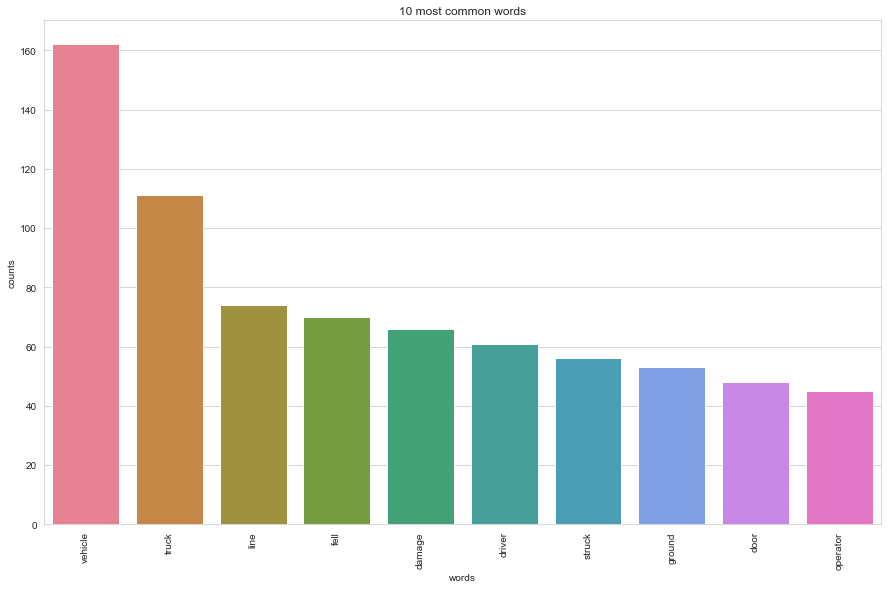

In [22]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(onlyInc_DupRemoved['Incident Description'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# Other High frequency words - Top 30 shown here

In [23]:
freq_updated = pd.Series(' '.join(onlyInc_DupRemoved['Incident Description']).split()).value_counts()[:30]
freq_updated

vehicle      160
truck        108
line          73
fell          70
damage        65
fire          63
driver        60
struck        55
ground        52
door          48
operator      45
oge           44
contact       43
tree          43
service       41
hit           39
pole          38
rear          38
control       37
water         37
found         36
pump          36
first         36
wire          35
light         35
one           35
foot          35
valve         35
open          34
contacted     34
dtype: int64

# Tokenization of documents

In [24]:
import nltk
nltk.download('punkt')
tokens = onlyInc_DupRemoved['Incident Description'].apply(lambda x : TextBlob(x).words)
tokens.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\ProgramData\Anaconda3\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [first, aid, incident, leaving, home, go, trou...
1    [running, extendo, stick, felt, pop, shoulder,...
2    [contract, working, sump, reclaim, contract, f...
3    [contract, tree, worker, tripped, and/or, slip...
7    [inventorying, grating, material, delivered, c...
Name: Incident Description, dtype: object

# WORD CLOUD for the descriptions                                                                     (Visualizing text data in which the size of each word indicates its frequency or importance)¶

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

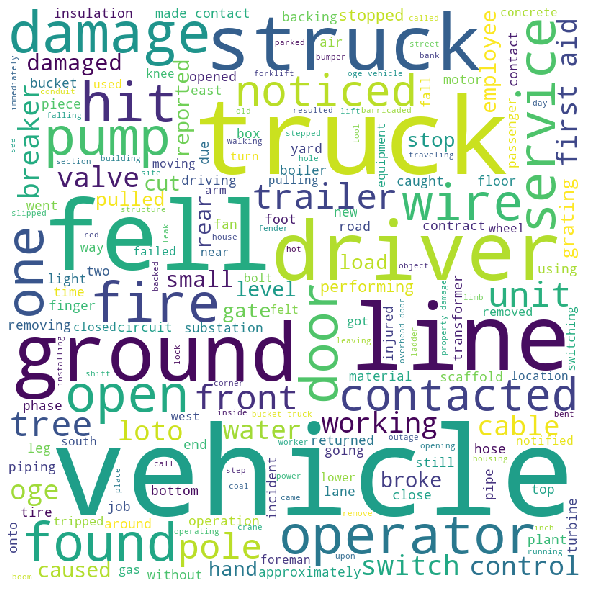

In [26]:
full_text = " ".join(review for review in onlyInc_DupRemoved['Incident Description'])

my_cloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(full_text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(my_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [27]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
#  stop_words= 'english',ngram_range=(1,1))
# train_vect = tfidf.fit_transform(onlyInc_DupRemoved['Incident Description'][:10])

# train_vect

In [28]:
# print(train_vect.__str__())

In [29]:
# Create Corpus
# texts = tokens

# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]

# # View
# print(corpus[:1])

In [30]:
# # Human readable format of corpus (term-frequency)
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [31]:
# import gensim
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=5, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

In [32]:
# # Print the Keyword in the 10 topics
# print(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [33]:
# from gensim.models import CoherenceModel
# # Compute Perplexity
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

# Feature Extraction Techniques for Text Data

# 1) Bag of words
# 2) TF-IDF

1) Bag of Words has been implemented for this usecase(More about it is followed)


2) TF = (Number of times term T appears in the particular row) / (number of terms in that row)
IDF = IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.
TF*IDF is the multiplication of both. Higher this value, important is the word. 

# Install gensim package

In [34]:
#!pip install -U gensim

# Bag of Words approach for Feature Extraction

In [35]:
import gensim
dictionary = gensim.corpora.Dictionary(tokens)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokens]
bow_corpus[7]

[(3, 1),
 (103, 1),
 (104, 1),
 (105, 1),
 (106, 1),
 (107, 1),
 (108, 1),
 (109, 1),
 (110, 1),
 (111, 1)]

In [36]:
bow_doc_7 = bow_corpus[7]
for i in range(len(bow_doc_7)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_7[i][0], 
                                               dictionary[bow_doc_7[i][0]], 
bow_doc_7[i][1]))

Word 3 ("fell") appears 1 time.
Word 103 ("employee") appears 1 time.
Word 104 ("interstate") appears 1 time.
Word 105 ("onto") appears 1 time.
Word 106 ("ramp") appears 1 time.
Word 107 ("southbound") appears 1 time.
Word 108 ("spilled") appears 1 time.
Word 109 ("trailer") appears 1 time.
Word 110 ("transformer") appears 1 time.
Word 111 ("turning") appears 1 time.


# Topic Modeling - Latent Dirichlet allocation

In [37]:
lda_model_mine = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

# What are the Topics created using LDA ?

In [27]:
for idx, topic in lda_model_mine.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"vehicle" + 0.008*"truck" + 0.008*"driver" + 0.007*"fire" + 0.007*"fell" + 0.007*"line" + 0.006*"damage" + 0.005*"ground" + 0.005*"foot" + 0.005*"oge"
Topic: 1 
Words: 0.009*"line" + 0.007*"load" + 0.006*"phase" + 0.006*"cable" + 0.006*"hit" + 0.005*"circuit" + 0.005*"valve" + 0.005*"driver" + 0.005*"pump" + 0.005*"truck"
Topic: 2 
Words: 0.019*"truck" + 0.011*"tree" + 0.010*"vehicle" + 0.006*"door" + 0.005*"found" + 0.005*"line" + 0.005*"boom" + 0.005*"fire" + 0.004*"damaged" + 0.004*"water"
Topic: 3 
Words: 0.032*"vehicle" + 0.012*"struck" + 0.010*"damage" + 0.006*"fell" + 0.006*"light" + 0.006*"rear" + 0.006*"ground" + 0.006*"pipe" + 0.006*"gate" + 0.006*"driver"
Topic: 4 
Words: 0.008*"fire" + 0.006*"vehicle" + 0.005*"operator" + 0.005*"incident" + 0.005*"control" + 0.005*"performing" + 0.004*"service" + 0.004*"employee" + 0.004*"breaker" + 0.004*"pole"


# Evaluation Metrics of LDA Model
# An ideal LDA model should have low perplexity and high coherence scores.

In [0]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model_mine.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_mine, texts=tokens, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.790233528196843

Coherence Score:  0.34364664060199374


# Check the tokens of a random observation before LDA model

In [0]:
tokens[7]

WordList(['inventorying', 'grating', 'material', 'delivered', 'capital', 'project', 'tripped', 'piece', 'grating', 'extending', 'pallet', 'inventoried', 'fell', 'ground'])

# For the same observation, heck the coherency scores assigned for each topic created by LDA model. For this observation, it primarily belongs to Topic 1 as it has the highest score

In [29]:
for index, score in sorted(lda_model_mine[bow_corpus[7]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_mine.print_topic(index, 5)))


Score: 0.6360756158828735	 
Topic: 0.010*"vehicle" + 0.008*"truck" + 0.008*"driver" + 0.007*"fire" + 0.007*"fell"

Score: 0.30819398164749146	 
Topic: 0.019*"truck" + 0.011*"tree" + 0.010*"vehicle" + 0.006*"door" + 0.005*"found"

Score: 0.01863205060362816	 
Topic: 0.009*"line" + 0.007*"load" + 0.006*"phase" + 0.006*"cable" + 0.006*"hit"

Score: 0.01856720820069313	 
Topic: 0.008*"fire" + 0.006*"vehicle" + 0.005*"operator" + 0.005*"incident" + 0.005*"control"

Score: 0.018531154841184616	 
Topic: 0.032*"vehicle" + 0.012*"struck" + 0.010*"damage" + 0.006*"fell" + 0.006*"light"


# Visualize LDA model created, using pyLDAvis package

In [0]:
#!pip install pyLDAvis

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

If you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

In [38]:
import pyLDAvis
import pyLDAvis.gensim 
# Visualize the topics
pd.options.display.max_colwidth = 5000
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_mine, bow_corpus, dictionary)
pyLDAvis.display(vis)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# Apply this model on test data set (Hazards or potential safety incidents recorded by Safety team) to see which hazard has highest similarity to a past occurred safety incident. Action can be taken to avoid the recurrence.

In [38]:
#os.chdir(r'C:\\Users\\govindsg\\Google Drive\\Spring 2020 OGE\\OGE\\Lacerations text analytics\\2nd phase\\')
inc = pd.read_excel('/content/Potential_Incidents.xlsx',skiprows=2,skipfooter=3)
inc.head()

,Record No.,Date Created,Created By,Date Of Observation,Business Unit,Location,Department,Member Observation,Contractors,Contractor Company Name,Plant Contact/Project Manager,Description of Work,SWP/Tailboard Completed?,Adequate Planning/Preparation,Chemical Use,Corrective Action,Engaged in Task,Fall from Heights,Following Policies/Procedures,Housekeeping,Identifying Hazards,Line of Fire,Manual Lifting,Proper Tool for the Job,Proper Operation,Proper PPE,Comments (PPE),Risks adequately mitigated,Self/Team induced productivity pressures,Slips Trips and Falls,Struck Against/By,Tool Condition,Explain At Risk Items marked above,Did you have a conversation with the member(s) observed?,Observer,Second Observer,Safety Professional,Mobile?
0,1144,2020-01-09,Tanner Brady,2020-01-09 10:13:10,Power Supply,McClain Power Plant,NaN,0.0,1.0,Northwest Crane,NaN,Lifting pump and moving over to staging area.,1.0,Safe,NaN,0.0,Safe,NaN,Safe,Safe,Safe,Safe,Safe,Safe,Safe,1.0,NaN,Safe,NaN,Safe,Safe,Safe,NaN,1.0,Tanner Brady,NaN,NaN,True
1,1159,2020-01-13,Guillermo Sarmiento,2020-01-12 10:45:00,Power Supply,Horseshoe Lake Power Plant,Other,0.0,0.0,NaN,NaN,360 on vehicle,0.0,Safe,NaN,1.0,Safe,NaN,Safe,NaN,Safe,Safe,NaN,NaN,At Risk,1.0,NaN,Safe,NaN,NaN,NaN,NaN,"While performing 360 inspection on vehicle, fr...",1.0,Guillermo Sarmiento,NaN,Guillermo Sarmiento,True
2,1160,2020-01-13,Brent Perdue,2020-01-13 10:30:00,Power Delivery,Metro Service Center,PD Operations Services,1.0,0.0,NaN,NaN,Trouble shooting a capacitor stations communic...,0.0,Safe,Safe,1.0,Safe,Safe,Safe,Safe,Safe,Safe,Safe,Safe,Safe,0.0,Member has to wear reading glasses outside of ...,Safe,Safe,Safe,Safe,Safe,NaN,1.0,Brent Perdue,NaN,Brent Perdue,False
3,1162,2020-01-14,Guillermo Sarmiento,2020-01-14 10:43:31,Power Supply,Frontier Power Plant,Other,0.0,0.0,NaN,NaN,Site walk of plant,0.0,Safe,Safe,1.0,Safe,Safe,Safe,Safe,At Risk,Safe,Safe,At Risk,NaN,1.0,NaN,Safe,Safe,Safe,Safe,At Risk,Replace old rope with new rope. Or replace w ...,1.0,Guillermo Sarmiento,Tanner Brady,Tanner Brady,True
4,1172,2020-01-14,Cody Magby,2020-01-14 15:43:10,Power Delivery,South District Service Center,Construction Services,1.0,0.0,NaN,NaN,7 pole extension with 3 pot banks,1.0,Safe,NaN,0.0,Safe,Safe,Safe,Safe,Safe,Safe,Safe,Safe,Safe,1.0,"ppe looked great, reflective vest in use.",Safe,Safe,Safe,Safe,Safe,NaN,1.0,Cody Magby,Gary Parks,Cody Magby,True


#Cleaning Text data just like the training dataset mentioned earlier -
#Removing Punctuation, stop words, irrelevant words, numerics, correcting spellings, stemming to root words

In [0]:
inc['Description of Work'] = inc['Description of Work'].apply(lambda x : x.lower()).replace('[^\w\s]','')

In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [0]:
inc['Description of Work'] = inc['Description of Work'].apply(lambda x : " ".join(x for x in str(x).split(' ') if x not in stop))

In [0]:
remove = ['ug','member','pts.','kva','three','equipment']
inc['Description of Work'] = inc['Description of Work'].apply(lambda x : ' '.join(x for x in str(x).split(' ') if not x.isdigit()))
inc['Description of Work'] = inc['Description of Work'].apply(lambda x : ' '.join(x for x in str(x).split(' ') if x not in remove))

In [0]:
from textblob import TextBlob

In [0]:
inc['Description of Work'].apply(lambda x: str(TextBlob(x).correct()))

In [45]:
from textblob import Word
inc['Description of Work'] = inc['Description of Work'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
inc['Description of Work'].head()

0                    lifting pump moving staging area.
1                                              vehicle
2    trouble shooting capacitor station communicati...
3                                      site walk plant
4                              pole extension pot bank
Name: Description of Work, dtype: object

# **Building N-grams** : An N-gram is an N-token sequence of words

# Idea is to extract group of words together, like verb followed by a noun in this scenario. This could tell us what are the common situations in which a potential safety incident is being recorded. For example, a safety incident was recorded when installing a led lightbulb. We would not have known the context if we looked at only high frequency 'single' words. Example : 'Installing' would not help us much even if its a high frequency word with out the word that's followed i.e. light bulb.

# Showing only top 10 records here in the interest of space

In [62]:
combined_text = inc['Description of Work'].str.cat(sep=' ')
split_words = combined_text.split(' ')
for word in split_words[:10]:
    print(word)

lifting
pump
moving
staging
area.
vehicle
trouble
shooting
capacitor
station


In [0]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import webtext

In [0]:
finder = BigramCollocationFinder.from_words(split_words)

# Top 10 Bigrams sorted based on likelihood ratio

In [60]:
finder.nbest(BigramAssocMeasures.likelihood_ratio,10)

[('pot', 'bank'),
 ('single', 'phase'),
 ('road', 'widening'),
 ('trouble', 'shooting'),
 ('turbine', 'deck'),
 ('led', 'light'),
 ('dead', 'end'),
 ('slack', 'span'),
 ('control', 'room'),
 ('dust', 'collector')]

# Top 10 Trigrams sorted based on likelihood ratio

In [61]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from nltk.corpus import webtext
Tri_finder = TrigramCollocationFinder.from_words(split_words)
Tri_finder.nbest(TrigramAssocMeasures.likelihood_ratio,10)

[('pot', 'bank', 'de'),
 ('build', 'pot', 'bank'),
 ('building', 'pot', 'bank'),
 ('pot', 'bank', 'accepting'),
 ('pot', 'bank', 'eai'),
 ('pot', 'bank', 'inch'),
 ('replacing', 'pot', 'bank'),
 ('pole', 'pot', 'bank'),
 ('pot', 'bank', 'service'),
 ('pot', 'bank', 'transporting')]

# Convert to Tokens

In [46]:
tokens_testdata = inc['Description of Work'] .apply(lambda x : TextBlob(x).words)
tokens_testdata.head()

0               [lifting, pump, moving, staging, area]
1                                            [vehicle]
2    [trouble, shooting, capacitor, station, commun...
3                                  [site, walk, plant]
4                         [pole, extension, pot, bank]
Name: Description of Work, dtype: object

#Bag of Words for test data

In [47]:
dictionary_test = gensim.corpora.Dictionary(tokens_testdata)
bow_corpus_test = [dictionary_test.doc2bow(doc) for doc in tokens_testdata]
bow_corpus_test[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

# Apply LDA model created on first observation from test data set. Check for Topics create and respective coherency scores. 

In [48]:
bow_vector = dictionary.doc2bow(tokens_testdata[0])
for index, score in sorted(lda_model_mine[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_mine.print_topic(index, 5)))

Score: 0.5072685480117798	 Topic: 0.032*"vehicle" + 0.012*"struck" + 0.010*"damage" + 0.006*"fell" + 0.006*"light"
Score: 0.371041864156723	 Topic: 0.009*"line" + 0.007*"load" + 0.006*"phase" + 0.006*"cable" + 0.006*"hit"
Score: 0.040611542761325836	 Topic: 0.010*"vehicle" + 0.008*"truck" + 0.008*"driver" + 0.007*"fire" + 0.007*"fell"
Score: 0.04056527465581894	 Topic: 0.019*"truck" + 0.011*"tree" + 0.010*"vehicle" + 0.006*"door" + 0.005*"found"
Score: 0.04051275551319122	 Topic: 0.008*"fire" + 0.006*"vehicle" + 0.005*"operator" + 0.005*"incident" + 0.005*"control"


# Apply LDA model on all observations from Test data. For all observations, create a dictionary of actual observation number and respective coherency scores

In [0]:
bow_vector = dictionary.doc2bow(tokens_testdata[0])
rownumberAndScore = {}
for i in bow_corpus_test:
 for index, score in sorted(lda_model_mine[i], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_mine.print_topic(index, 5)))
    #print("rowNo: {}\t Score: {}".format(bow_corpus_test.index(i), score))
    rownumberAndScore.update( {bow_corpus_test.index(i) : score} )

In [0]:
rownumberAndScore

# Get the observation number with maximum coherency score. The idea is to fetch the observation from test data which has maximum similarity to the topics extracted from training data

In [0]:
max(rownumberAndScore, key=rownumberAndScore.get)

In [0]:
236/5   # Each observation has 5 rows (topics) in this dictionary. Hence dividing by 5 to get observation no from actual test data set

In [52]:
inc.iloc[47]['Description of Work']

'contractor sucking manhole'

# This analysis helps realize areas which are seeing more safety incidents, thereby calling action to take necessary precautions and avoid future accidents.